### Аннотация

Ноутбук составлен на основе материалов [[1]](https://github.com/SciProgCentre/python-scientific-book/blob/master/pages/StudentEdition/05.ipynb), [[2]](https://github.com/SciProgCentre/python-scientific-book/blob/master/pages/StudentEdition/07.ipynb)

In [1]:
from math import sin

# NumPy


## Создание Numpy массивов

In [3]:
import numpy as np

a = np.array([1, 2, 3], float) # Однмемерный массив из списка 
b = np.repeat(-1. ,10) # Массив полученные повоторением исходного объекта
c = np.zeros((3, 5)) # Матрица из нулей размера 3х5
d = np.ones((2, 2, 2)) # Трехмерный массив из единиц
e = np.eye(5) # Единичная матрица
print(a, b, c, d, e, sep='\n\n')
print(c.shape) # Возвращает размерность массива, для двумерного это количество строк и столбцов

[1. 2. 3.]

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
(3, 5)


## Арифметические операции с массивами  и векторизация

Полезной особенностью numpy-массивов является так называемая _векторизация_ --- возможность делать быстрые поэлементные операции с массивами без использования цикла `for`.

In [4]:
a = np.array([1, 2, 3], float)
b = np.array([5, 2, 6], float)
print(a + b)
print(a - b)
print(a * b)
print(b / a)
print(a % b)
print(b ** a)
print(np.sqrt(a))
print(np.sum(a))
print(np.prod(b))
print(a.dot(b)) # Скалярное произведение
print(a > b)
print(np.where(a != 2, 1 / a, a))

[6. 4. 9.]
[-4.  0. -3.]
[ 5.  4. 18.]
[5. 1. 2.]
[1. 0. 3.]
[  5.   4. 216.]
[1.         1.41421356 1.73205081]
6.0
60.0
27.0
[False False False]
[1.         2.         0.33333333]


## Линейная алгебра

NumPy также предоставляет набор встроенных функций и методов для работы с линейной алгеброй. Это всё можно найти в под-модуле `linalg`.

In [8]:
a = np.array([[4, 2, 0], [9, 3, 7], [1, 2, 1]], float)
b = a.T # Транспонированый массив
print(np.linalg.det(a)) # Ищем детерминант 
vals, vecs = np.linalg.eig(a)
print(vals)
print(vecs)

-48.00000000000003
[ 8.85591316  1.9391628  -2.79507597]
[[-0.3663565  -0.54736745  0.25928158]
 [-0.88949768  0.5640176  -0.88091903]
 [-0.27308752  0.61828231  0.39592263]]


In [46]:
np.random.seed(42)
array = np.random.randint(3, size=100)
# print(array)

matrix = array.reshape(10, 10)
# print(matrix)
print([np.sum(row) for row in matrix])
print([np.sum(row) for row in matrix.T])
print(matrix)
print(matrix[::4, ::4])
print(np.linalg.det(matrix[::, ::]))

[13, 11, 8, 14, 9, 11, 8, 13, 7, 4]
[11, 7, 10, 10, 6, 8, 12, 11, 12, 11]
[[2 0 2 2 0 0 2 1 2 2]
 [2 2 0 2 1 0 1 1 1 1]
 [0 0 1 1 0 0 0 2 2 2]
 [1 2 1 1 2 1 2 2 0 2]
 [0 2 2 0 0 2 1 0 1 1]
 [1 0 1 0 1 2 2 0 2 2]
 [1 0 1 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 2 2 1]
 [2 0 1 0 0 1 2 0 1 0]
 [0 0 0 2 0 0 0 2 0 0]]
[[2 0 2]
 [0 0 1]
 [2 0 1]]
390.0000000000004


## Операции с индексами 
Оперативная память компьютера линейна, и поэтому даже многомерные массивы, на самом деле являются некоторыми линейными структурами, над которыми существуют система индексов, говорящих как именно читать этот линейный блок. Проведение операций над индексами в большистве случаев эффективно и поэтому операции смены размерности массива или транспонирования выполняются быстро

In [10]:
a = np.asarray([[1, 2], [3, 4]])
b = a.T # Транспонированый массив
print(b)

[[1 3]
 [2 4]]


In [11]:
b[0, 0] = 10
print(b)

[[10  3]
 [ 2  4]]


In [12]:
print(a)

[[10  2]
 [ 3  4]]


Как мы видим при изменени переменной `b` изменилась переменная `a`. Это произошло потому, что обе эти переменные использубют один и тот же кусок памяти, но по разному 

## Срезы

В numpy реализован удобный способ работы с элементами матрицы. Он позволяет пройтись по элементам с определенным шагом и в определенном направлении.

Пусть у нас есть двумерная матрица. Стоит запомнить следущий синтаксис:
- `[:]` -- получить все элементы матрицы
- `[:, 0]` -- получить первый столбец матрицы
- `[2, :]` -- получить третью строку матрицы
- `[-2, :]` -- получить вторую строку матрицы с конца
- `[::3, 0]` -- получить каждый третий элемент из первой строки
- `[1:-1:3, 0]`-- получить каждый третий элемент первой строки начиная со второго и, возможно, закнчивая предпоследним

In [9]:
array = np.array([i for i in range(0, 81*4, 4)])
print(array, array.shape, "\n", sep="\n\n")

matrix = array.reshape(9, 9)
print(matrix, matrix.shape, "\n", sep="\n\n")

print(matrix[::2, ::2], "\n")

print((matrix[::3, ::3] + matrix[::3, ::3].T) / 50, "\n")

[  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212
 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284
 288 292 296 300 304 308 312 316 320]

(81,)



[[  0   4   8  12  16  20  24  28  32]
 [ 36  40  44  48  52  56  60  64  68]
 [ 72  76  80  84  88  92  96 100 104]
 [108 112 116 120 124 128 132 136 140]
 [144 148 152 156 160 164 168 172 176]
 [180 184 188 192 196 200 204 208 212]
 [216 220 224 228 232 236 240 244 248]
 [252 256 260 264 268 272 276 280 284]
 [288 292 296 300 304 308 312 316 320]]

(9, 9)



[[  0   8  16  24  32]
 [ 72  80  88  96 104]
 [144 152 160 168 176]
 [216 224 232 240 248]
 [288 296 304 312 320]] 

[[0.  2.4 4.8]
 [2.4 4.8 7.2]
 [4.8 7.2 9.6]] 



## Чтение даных

Numpy также предоставляет функционал для чтения данных, который бывает весьма полезен

In [10]:
!cat data/data.txt

2 2 3


In [11]:
data = np.loadtxt('./data/data.txt')
data

array([2., 2., 3.])

## Задание по numpy

1. Создайте вектор с элементами от 1 до 99 включительно
2. Выведите все значения с шагом 3
3. Посчитайте сумму троек элементов из пункта `1`
4. Сделайте `reshape` для массива из предыдущего пункта в матрицу размера 11х3
5. Транспонируйте матрицу из предыдущего пункта
6. Произведите векторное умножение матрицы из предыдущего пункта на вектор размерности 11 из элементов от -9 до 1
7. Запишите срез матрицы из пункта `5` в файл `matrix.dat`. Срез должен включать в себя 1, 5, 9 столбцы и 0 и 2 строки. **Подсказка**: требуется вписать элементы матрицы, которая состоит из пересечения соответсвующих столбцов и строк.
8. Посчитайте детерминант матрицы, которая содержит в себе строки 2, 5, 8 из матрицы пункта `4`.
9. `*`Создайте два вектора длины 10. Элементы первого вектора -- первые 10 простых чисел со знаком минус, второго вектора -- первые 10 чисел последовательности Фибоначчи. Посчитайте скалярное произведение двух векторов. **Указание**: для получения простых чисел и чисел из последовательности Фибоначчи реализуйте функции `prime_number` и `fibonacci_number`.
10. `*`Реализуйте функцию вычисления матричной экспоненты
$e^X = \sum\limits_{k = 0}^{n} \frac{1}{k!} X^k$, $X^k$ -- матрица $X$ в степени $k$, $X^0 = I$

Замечания:
- Пункты `*` реализуются по завршению блока заданий на `matplotlib`.
- Задания делать внутри следующей ячейки ноутбука. Если работаете в Pycharm, то сохраняйте в файлы `numpy_i.py`, где `i` указывает пункт задания.
- Задания, или готовый ноутбук, сохранять в директории (папке) `classwork04`. **Никак иначе диеректорию не называть!**

In [4]:
import numpy as np
# task1
arr = np.array([i for i in range(1, 100,1)])
print(arr, "\n") 

#task2
print(arr[::3], "\n")

#task3
sumarr = arr[1::3] + arr[0::3] + arr[2::3]
print(sumarr,"\n")

#task4
sumarr = sumarr.reshape(11,3)
print(sumarr, "\n") 

#task5
Tsumarr = sumarr.T.reshape(3,11)
print(Tsumarr, "\n") 

#task6
print(Tsumarr @ np.array([i for i in range(-9, 2, 1)]).reshape(1,11).T, "\n")

#task7
Tsumarr1 = Tsumarr[0::2,1::4]
print(Tsumarr1, "\n")
np.savetxt("matrix.dat",Tsumarr1)


#task8
print((np.linalg.det(sumarr[2::3])),"\n")








[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] 

[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79 82 85 88 91 94 97] 

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132 141 150 159
 168 177 186 195 204 213 222 231 240 249 258 267 276 285 294] 

[[  6  15  24]
 [ 33  42  51]
 [ 60  69  78]
 [ 87  96 105]
 [114 123 132]
 [141 150 159]
 [168 177 186]
 [195 204 213]
 [222 231 240]
 [249 258 267]
 [276 285 294]] 

[[  6  33  60  87 114 141 168 195 222 249 276]
 [ 15  42  69  96 123 150 177 204 231 258 285]
 [ 24  51  78 105 132 159 186 213 240 267 294]] 

[[-4785]
 [-5280]
 [-5775]] 

[[ 33 141 249]
 [ 51 159 267]] 

-4.1438852349529036e-11 



# Matplotlib

# Построение графиков

Для построения графиков чаще всего используется `matplotlib.pyplot`. Больше информации можно найти по этим ссылкам:
* [Научная графика в python](https://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/tree/master/) --- уроки по `matplotlib` на русском языке.
* [Галерея  `matplotlib`](https://matplotlib.org/3.1.1/gallery/index.html) --- галерея примеров на официальном сайте `matplotlib`, выбираете нужный вам пример и смотрите как он сделан.

Построить график достаточно просто:

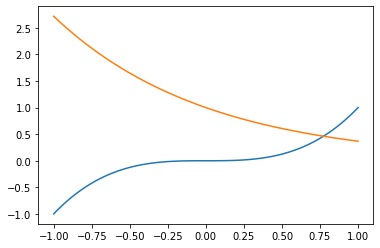

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-1, 1, 100)  # Создаем массив из ста точек на промежутке (-1; 1)
y = x**3
plt.plot(x, y)
y2 = np.exp(-x)
plt.plot(x, y2)
plt.show()

Как вы можете заметить построеный график хорош всем, кромо того обстоятельства что он нарушает все правила оформления графиков для лабораторных работ. Постораемся оформить его. 
Следующая иллюстрация поможет нам узнать как называются элементы изображения:


![](https://matplotlib.org/_images/anatomy.png)


Используя поиск по сайту [matplotlib.org](https://matplotlib.org/3.1.1/index.html) можно подробно узнать как настроить тот или иной элемент изображения. А мы приведем краткое описание полезных функции:

/tmp/ipykernel_27841/594084838.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='both', alpha=1)
/tmp/ipykernel_27841/594084838.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', axis='both', alpha=0.5)


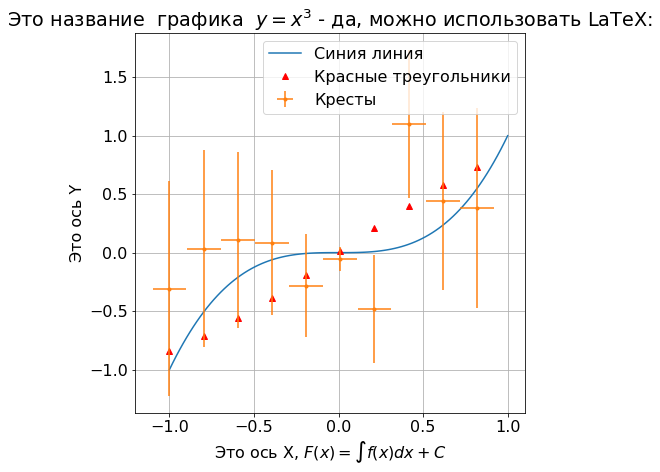

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 # Управление стилем, в данном случаем - размером шрифта 
 # Создаем фигуру
plt.figure(figsize=(7,7))

# Подписываем оси и график
plt.title(r"Это название  графика  $y = x^3$ - да, можно использовать LaTeX:")
plt.ylabel("Это ось Y")
plt.xlabel(r"Это ось X, $F(x) = \int f(x) dx + C$")



# Добавляем данные
x = np.linspace(-1,1,100)
y = x**3
plt.plot(x,y, label="Синия линия")

# Еще данные
x2 = x[::10]
y2 = np.sin(x2)
plt.plot(x2,y2, 'r^', label='Красные треугольники')
# 'r^' - задает стиль линии - красные (red) треугольники (^), подробнее в документации

# Данные с ошибками
mu = np.sin(x2)
sigma = np.abs(mu)**0.5
y2 = np.random.normal(mu, sigma)
# Можно рисовать ошибки
plt.errorbar(x2,y2, yerr=sigma, xerr=0.1, fmt='.', label='Кресты') 

# Активируем сетку
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)

# Активируем легенду графика
plt.legend()
# Внимание, запускаете вашу программу как сценарий, то что бы показать график
# Используйте эту команду
# plt.show()
# Сохраняем изображение в текущую директорию
plt.savefig('example.png')

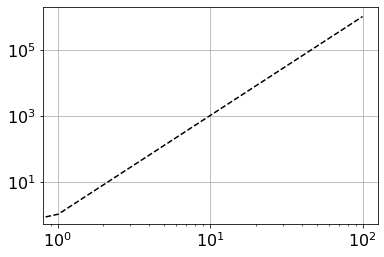

In [14]:
# Логарифмический масштаб по оси x (аналогично для y)
plt.xscale('log')
plt.yscale('log')
# Сетка
plt.grid(True)
# Добавляем данные
x = np.linspace(0,100,100)
y = x**3
plt.plot(x,y,"k--", label="Синия линия") # "k--" --- черная прерывистая линия

In [15]:
plt.xscale??

## Общие замечания

1. Не советуется сильно изменять стандартный размер фигуры, который равен `[6.4, 4.8]`. Тогда не потребуется подстраивать раземер шрифта.
2. Попробуйте воспользоваться функцией `plt.tight_layout()`. Она *уберет* лишнее пустое пространство вокруг графика.
3. Для передачи *сырых* строк стоит пользоваться `r"my favorite $\LaTeX$"` $\rightarrow$ my favorite $\LaTeX$
4. Для сохранения графиков можно воспользоваться функцией `plt.savefig()`. По умолчанию возможно сохранять в `.pdf/.jpg/.png` и так далее.

## Задание matplotlib

1. Нарисуйте точками график $\sin(x) x^{-2}$ для x со значениями от 0 до 100 с шагом 10
2. Добавьте сетку и описание осей для предыдущего графика
2. Нарисуйте непрерывной прямой график $e^{-x \sin(x)}$ для x со значениями от 10 до 100
3. Добавьте сетку и описание осей для предыдущего графика
4. Добавьте мелкую сетку для предыдущего графика (опция `plt.minorticks_on()`
5. Нарисуйте точками график $e^{\sqrt{x} \sin(x)}$ для x со значениями от 10 до 100
6. Нарисуйте график $x \sin^2(x)$ для x со значениями от 50 до 100
7. Сделайте логарифмический масштаб по оси ординат. Отразите этот факт в подписи к оси
8. Добавьте легенду точкам и подписи к графику

Замечания:
- Если указано сделать подпись осей, то нужно добавить подписи к двум осям графика
- Если указано ссделать подписи к графику, то нужно добавить оглавление графика, легенду для точек и кривых, подписи к осям
- Задания делать внутри следующей ячейки ноутбука. Если работаете в Pycharm, то сохраняйте в файлы `matplotlib_i.py`, где `i` указывает пункт задания.
- Задания, или готовый ноутбук, сохранять в директории (папке) `classwork04`. **Никак иначе диеректорию не называть!**

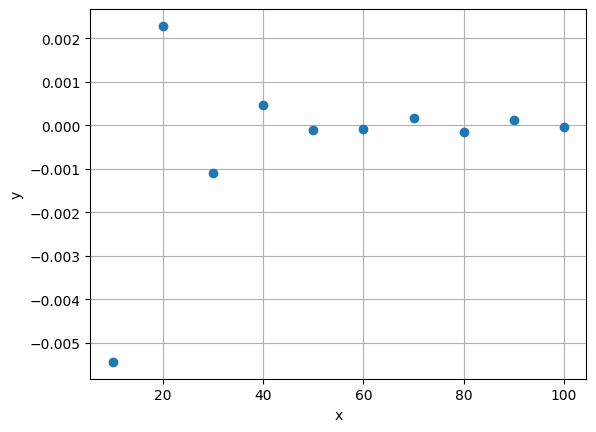

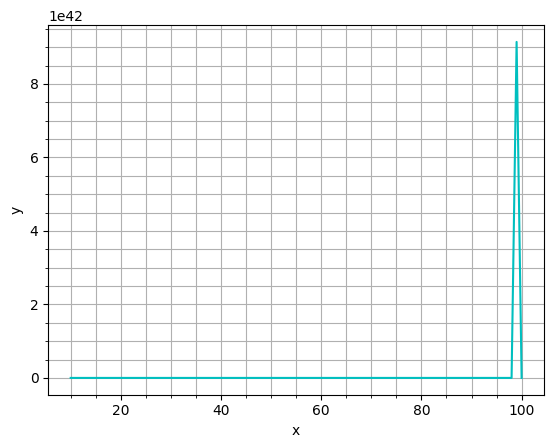

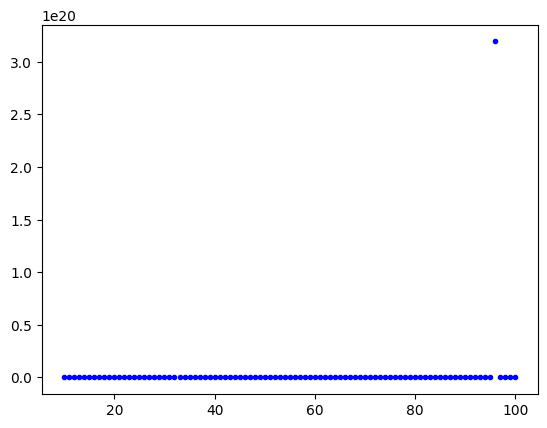

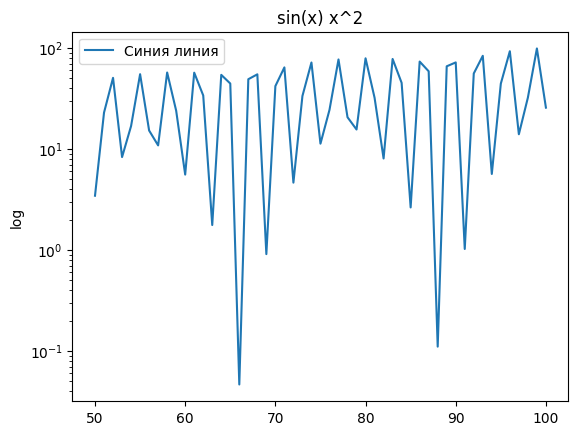

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Graph 1


x = np.array(range(0,110,10))
x= x[x != 0]
plt.ylabel("y")
plt.xlabel("x")
plt.grid(which='major')
y = np.sin(x) * (1/x**2)
plt.plot(x, y, "o")
plt.show()

#Graph 2 ионы водорода

x = np.array(range(10,101))
y = np.exp(1)**(-x*np.sin(x))
plt.ylabel("y")
plt.xlabel("x")
plt.minorticks_on()
plt.grid(which='minor')
plt.grid(which='major')
plt.plot(x,y,"c")
plt.show()

#Graph 3

plt.minorticks_off()
x =  np.array(range(10,101))
y = np.exp(1)**(((x**1/2)*np.sin(x)))
plt.plot(x,y,"bo",markersize = 3)
plt.show()


#Graph 4


plt.title("sin(x) x^2")
plt.ylabel("log")
plt.yscale('log')
x =  np.array(range(50,101))
y = (np.sin(x)**2) * x
plt.plot(x, y,label="Синия линия")
plt.legend()
plt.show()








## Data Analysis

Функция `fake_data_generator` выдает данные какого-то эксперимента. Но это не беда, ведь мы всегда можем обработать данные!

Узнайте свой порядковый номер в группе и с помощью функции `get_numbers` получите свои входные значения для функции `fake_data_generator`.

Полученные  экспериентальные данные используйте для нанесения на график. Затем попрбуйте *прикинуть* параметры прямой, которая могла бы проходить через экспериентальные точки.

### План действий

1. Сгенерируйте свои числа для задачи
2. Нанесите точки на график. В качестве ошибок по `x` используйте половину расстояния между соседними точками. Для ошибок по `y` используйте корень квадратный от модуля значения. Добавьте легенду "DATA"
3. Нанесите сетку на график
4. Выделите штрихованную прямую синего цвета, которая выделяет средний уровень точек по оси абсцисс. Добавьте легенду со значением среднего "mean x = "
5. Выделите штрих-пунктирную прямую красного цвета, которая выделяет средний уровень точек по оси ординат. Добавьте легенду со значением среднего "mean y = "
6. Нарисуйте черным цветом прямую, которая примерно описывает данные на графике. Добавьте легенду "fit"
7. Точки пересечения подгоночной кривой и средних значений выделить синим цветом
8. Добавить описание для оси абсцисс $\xi, cm\rightarrow$ `$\xi, cm$`
9. Добавить описание для оси ординат $\rho, mm^{-3}\rightarrow$`$\rho, mm^{-3}$`
10. Легенду разместите в правом нижнем углу или же в верхнем правом

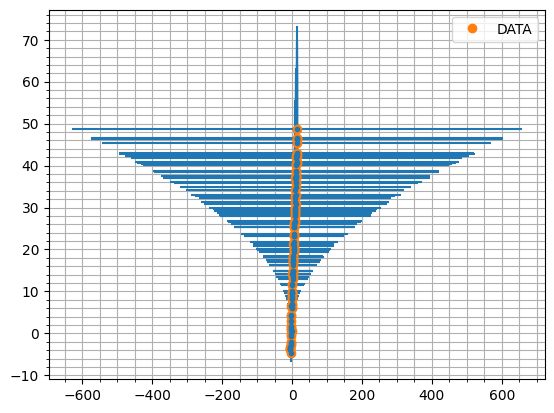

In [97]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

matplotlib.rcParams.update(matplotlib.rcParamsDefault)


def get_numbers(student):
    return student, (student + 4) % 5 + 3, student % 2 * 10 + 12, (student % 5 * 3 + 7) * 3 

def fake_data_generator(seed, vmin=0, vmax=10, size=100):
    import numpy as np
    np.random.seed(seed)
    data = np.random.randint(vmin, vmax, size=20)
    mean = data.mean()
    std = data.std()
    noise = np.random.normal(loc=mean, scale=std**.5, size=size)
    fake_x = np.array([-5 + i * 20 / size for i in range(size)])
    
    linear = lambda x, k=(.5 - np.random.rand()) * 15, b=np.random.rand()*10: k * x + b
    linear_data = linear(fake_x)
    fake_y = linear_data + noise
    return fake_x, fake_y

##################################################################################################################################################
#Task:

x = fake_data_generator(get_numbers(10))[0]
y = fake_data_generator(get_numbers(10))[1]
plt.grid(which='major')
plt.grid(which='minor')
plt.minorticks_on()
xerr = [(((x[i]**2) + (y[i])**2)** 1/2)/2 for i in range(len(x))]
yerr = [(abs(y[i]))**1/2 for i in range(len(y))]
plt.errorbar(x,y,yerr,xerr,fmt='.')
plt.plot(x,y,"o",label='DATA')
avx = np.average(x)
avy = np.average(y)
plt.legend()
#plt.axvline(avx)

plt.show()

